In [1]:
import graph.generate_graph 
import task_allocation_layer.task_allocation 
import numpy as np

In [2]:
import imp
imp.reload(graph.generate_graph )
imp.reload(task_allocation_layer.task_allocation)

<module 'task_allocation_layer.task_allocation' from '/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/task_allocation_layer/task_allocation.py'>

In [3]:
#parameters
N_depots = 3
N_drones = 20
N_packages = 40
N_transit_edges = 20

In [4]:
# get a graph that randomly generate depot nodes, transit nodes and package nodes and cost_matrix
TG, depots_node, transit_node, packages_node, transit_edges, cost_matrix = graph.generate_graph.return_Digraph(N_depots, N_transit_edges, N_packages)

In [5]:
#update other parameters
total_nodes = len(TG.nodes)
N_transits = len(transit_node)

# we get transit node, package node and depot node, now we store the rest nodes are normal node
normal_node = np.array([])
for i in range(len(TG.nodes())):
    if i not in depots_node and i not in transit_node and i not in packages_node:
        normal_node = np.append(normal_node, i)
    

In [6]:
drone_tours = task_allocation_layer.task_allocation.task_allocation(total_nodes, N_depots, N_packages, N_drones, cost_matrix, depots_node, transit_node, packages_node, normal_node)

task allocation done


/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/task_allocation_layer/task_allocation.py:122: OptimizeWarning: Sparse constraint matrix detected; setting 'sparse':True.
  res = linprog(c=cost_vector, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq,
/Users/luzy6/miniforge3/envs/UAV/lib/python3.9/site-packages/scipy/optimize/_linprog_util.py:843: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning, stacklevel=1)


In [7]:
import networkx as nx

In [8]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000

In [9]:
def dist(a, b, TG=TG):
    lat1 = TG.nodes[a]['lat']
    lon1 = TG.nodes[a]['lon']
    lat2 = TG.nodes[b]['lat']
    lon2 = TG.nodes[b]['lon']
#     print("node",a,lon1,lat1,"to node",b,lon2,lat2," liner distance:",haversine(lon1, lat1, lon2, lat2))
#     print(haversine(lon1, lat1, lon2, lat2))
#     print(lat1, lon1, lat2, lon2)
    return haversine(lon1, lat1, lon2, lat2)

In [10]:
drone_tours

[[1.0, 180.0, 1.0, 19.0, 10.0, 19.0],
 [19.0, 13.0, 19.0, 103.0, 19.0],
 [19.0, 104.0, 19.0, 105.0, 19.0],
 [19.0, 107.0, 19.0, 108.0, 19.0],
 [19.0, 111.0, 19.0, 132.0, 19.0],
 [19.0, 171.0, 19.0, 188.0, 19.0],
 [19.0, 199.0, 19.0, 203.0, 19.0],
 [74.0, 24.0, 74.0, 40.0, 74.0],
 [74.0, 50.0, 74.0, 54.0, 74.0],
 [74.0,
  59.0,
  74.0,
  75.0,
  74.0,
  78.0,
  74.0,
  79.0,
  74.0,
  80.0,
  74.0,
  99.0,
  74.0],
 [74.0, 100.0, 74.0, 114.0, 74.0],
 [74.0, 136.0, 74.0, 151.0, 74.0],
 [74.0, 164.0, 74.0, 167.0, 74.0],
 [74.0, 169.0, 74.0, 183.0, 74.0]]

In [11]:
# find each drones route
drone_routes = []
for i in range(len(drone_tours)):
    cur_route = [drone_tours[i][0]]
#     print("drone", i, "route:")
    for (node1, node2) in zip(drone_tours[i][:len(drone_tours[i])-1], drone_tours[i][1:]):
        cur_route.extend(nx.astar_path(TG, node1, node2, dist)[1:])
#         print(nx.astar_path(TG, node1, node2, dist))
    drone_routes.append(cur_route)

In [12]:
pos_location = {}
for i in TG.nodes:
    pos_location[i] = (TG.nodes[i]['lon'], TG.nodes[i]['lat'])
    

In [13]:
node_size = 1000
colo_map = {}
nod_size_map = {}
for i in transit_node:
    colo_map[i] = 'green'
    nod_size_map[i] = node_size
for i in packages_node:
    colo_map[i] = 'red'
    nod_size_map[i] = node_size
for i in depots_node:
    colo_map[i] = 'black'
    nod_size_map[i] = node_size
for i in normal_node:
    colo_map[i] = 'grey'
    nod_size_map[i] = 0
len(colo_map)
color_map = []
node_size_map = []
for i in range(len(colo_map)):
    color_map.append(colo_map[i])
    node_size_map.append(nod_size_map[i])

In [14]:
pos = nx.random_layout(TG)

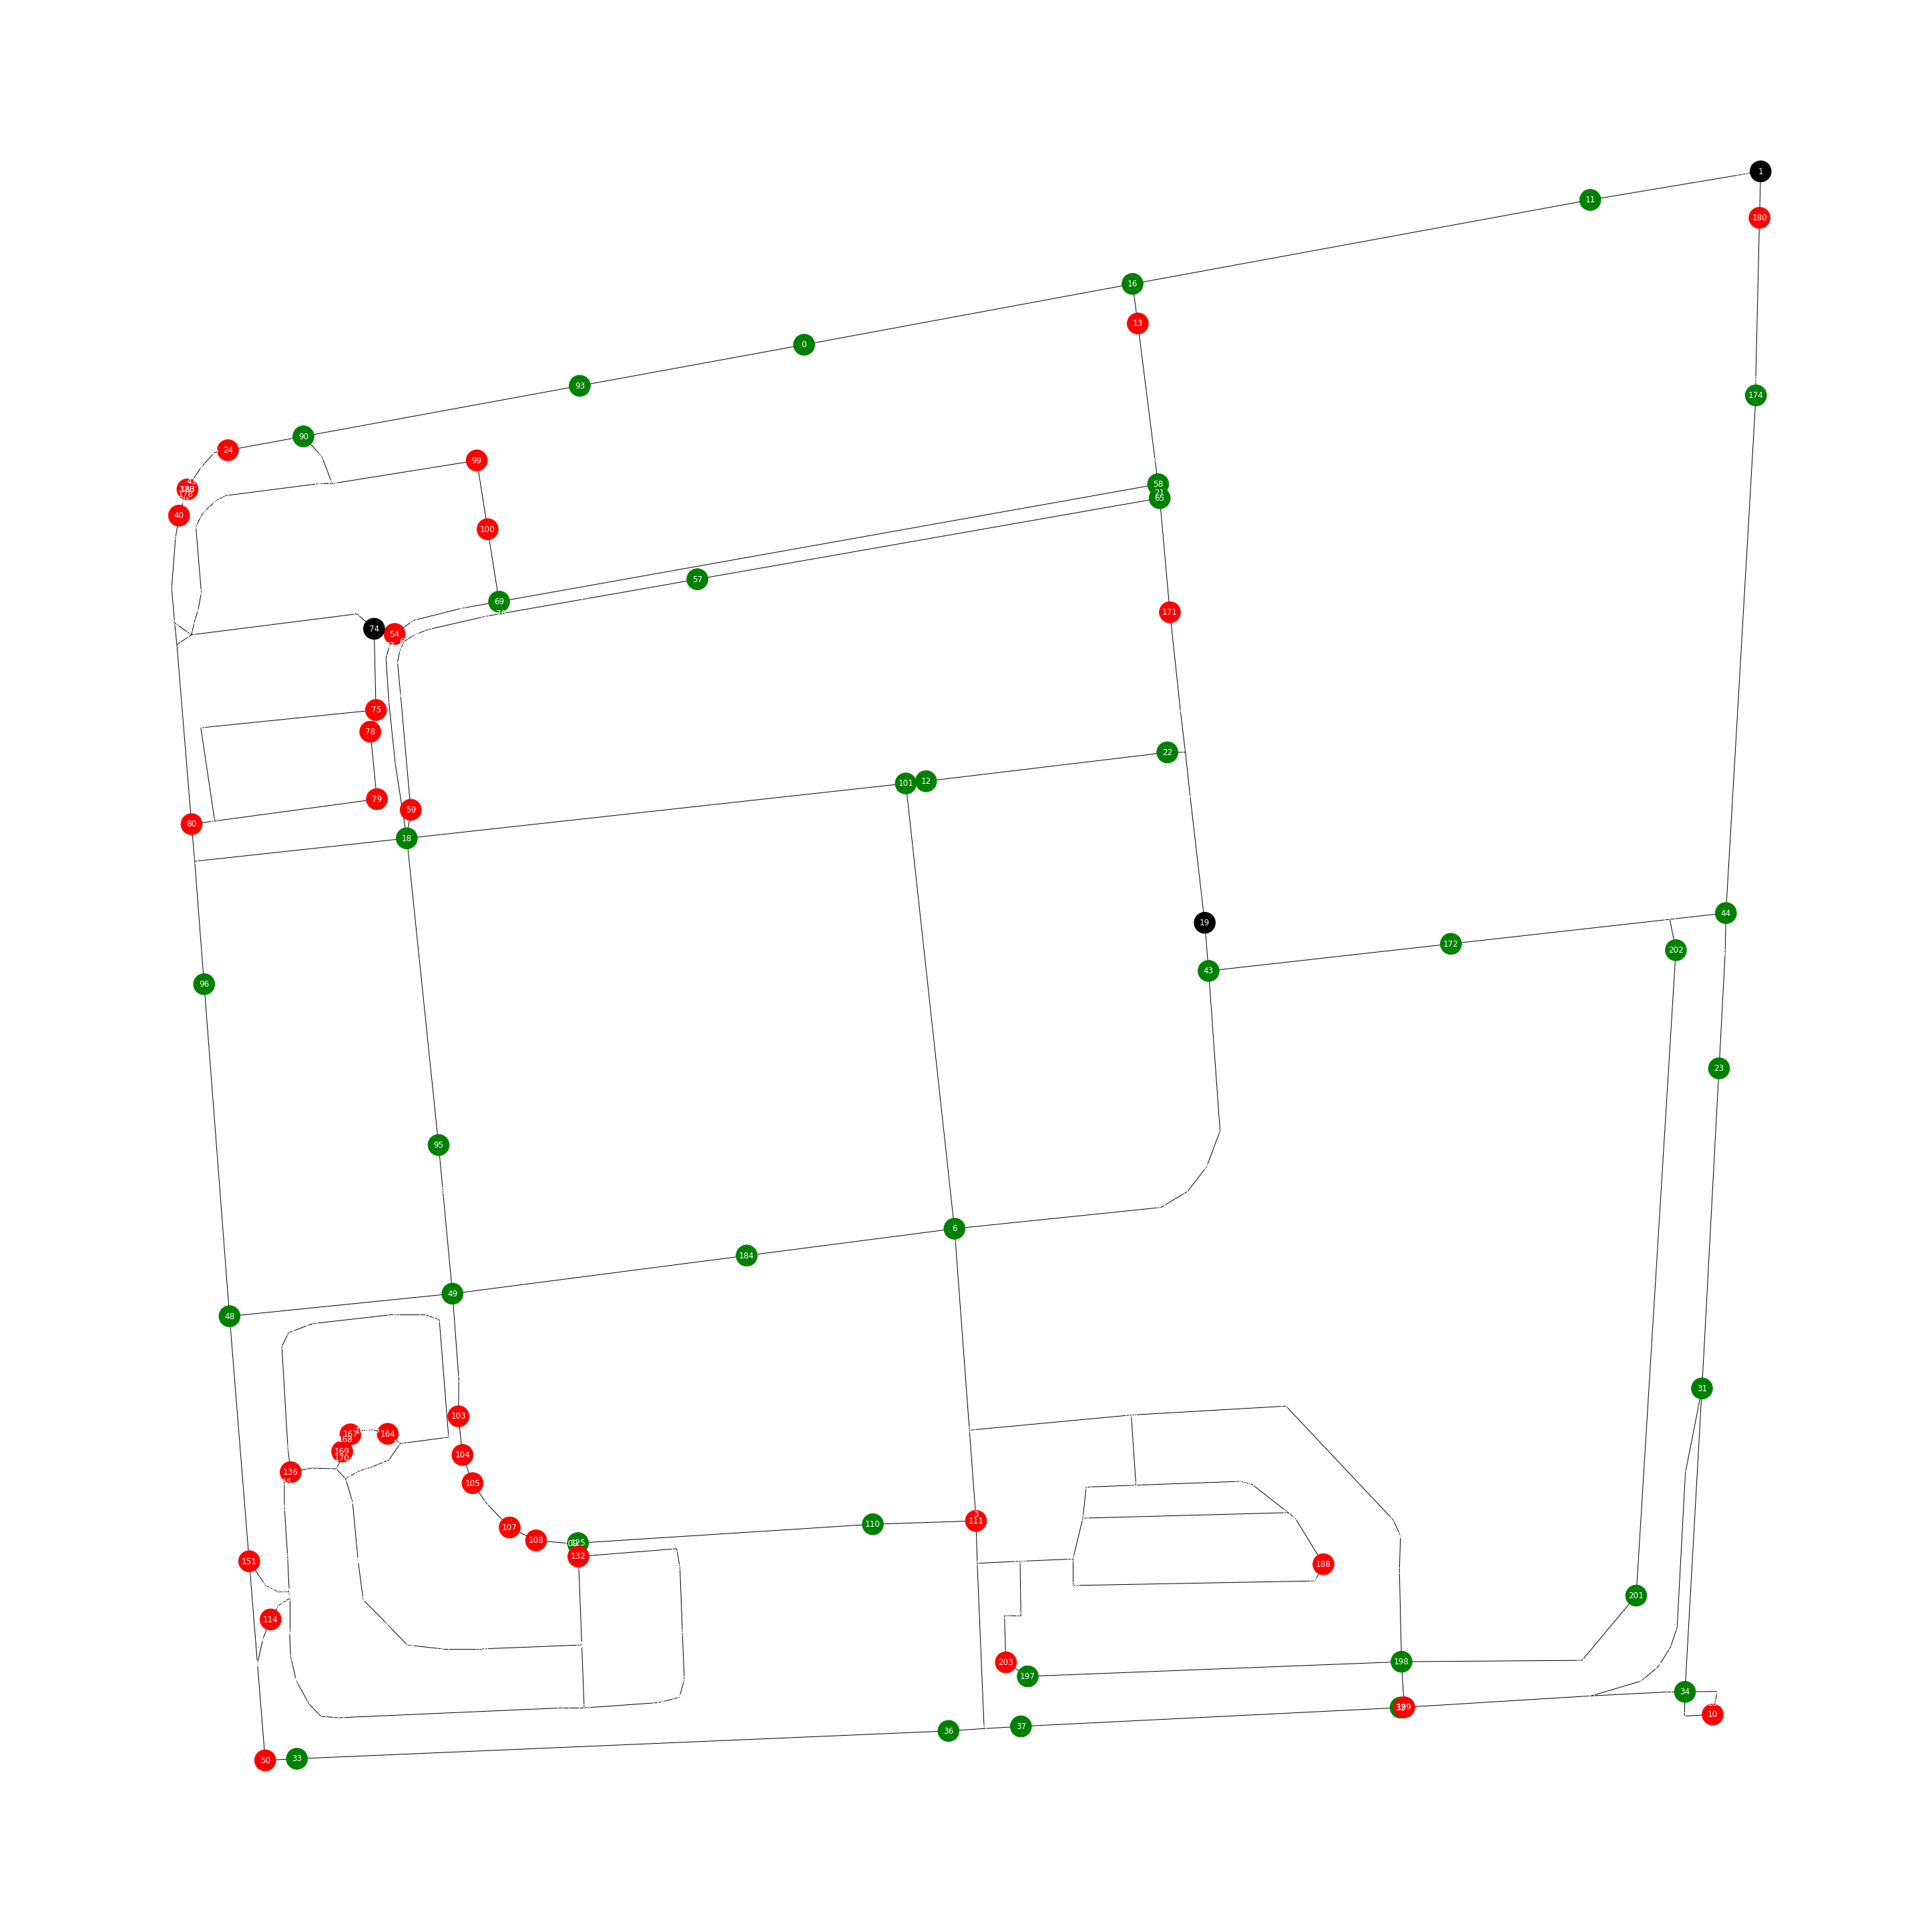

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (40, 40)  # 单位是inches
#green transit_node
#black depot_node
#red package node
#grey normal_node
nx.draw(TG, 
        pos=pos_location, 
        node_size=node_size_map, 
        cmap=plt.get_cmap('viridis'), 
        node_color=color_map, 
        width=1,
        with_labels=True, 
        font_color='white')

In [16]:
# [183, 90.0, 93.0, 0.0, 16.0, 11.0, 174.0, 44.0, 202.0, 201.0, 25]

In [17]:
# # each drone total delivery cost
# delivery_cost = []
# for i in range(len(drone_routes)):
#     this_cost = 0
#     for j in range(0,len(drone_routes[i])-1):
#         # transit edge dose not consume the distance flown by the drone
#         if TG.nodes[drone_routes[i][j]]['type'] == 'transit' and TG.nodes[drone_routes[i][j+1]]['type'] == 'transit':
#             continue
#         this_cost += TG.edges[drone_routes[i][j], drone_routes[i][j+1]]['weight']
#     delivery_cost.append(this_cost)
# print(delivery_cost)

In [18]:
# # we generate a new type graph
# transit_network = nx.Graph()
# # firstly, add transit nodes
# for i in transit_node:
# #     print(i)
#     transit_network.add_node(i
#                             , lon=TG.nodes[i]['lon']
#                             , lat=TG.nodes[i]['lat']
#                             , type='transit'
#                             )
# # then we add transit edges
# for edge in transit_edges:
#     transit_network.add_edge(edge[0], edge[1]
#                              ,type='transit'
#                              ,weight=0.0
#                              )
#     for t in transit_node: #transit to transtit (not a pair of transit node)
#         if (edge[0], t) not in transit_network.edges:
#             transit_network.add_edge(edge[0], t
#                              ,type='flight'
#                              ,weight=haversine(TG.nodes[edge[0]]['lon'], TG.nodes[edge[0]]['lat'], TG.nodes[t]['lon'], TG.nodes[t]['lat'])
#                              )
#         if (edge[1], t) not in transit_network.edges:
#             transit_network.add_edge(edge[1], t
#                              ,type='flight'
#                              ,weight=haversine(TG.nodes[edge[0]]['lon'], TG.nodes[edge[1]]['lat'], TG.nodes[t]['lon'], TG.nodes[t]['lat'])
#                              )
            
# print(len(transit_network.edges))


# # we add depots and packages
# for i in packages_node:
#     transit_network.add_node(i
#                              , lon=TG.nodes[i]['lon']
#                              , lat=TG.nodes[i]['lat']
#                              , type='package'
#                             )
# for i in depots_node:
#     transit_network.add_node(i
#                              , lon=TG.nodes[i]['lon']
#                              , lat=TG.nodes[i]['lat']
#                              , type='depot'
#                             )
# # finally we add edge ?depot to depot?, depot to package and depot to transit and transit to package
# for i in depots_node:
#     for j in transit_node: # depot to transit
#         transit_network.add_edge(i, j
#                                  ,type='flight'
#                                  ,weight=haversine(TG.nodes[i]['lon'], TG.nodes[i]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])# directly distance
#                                 )
# print(len(transit_network.edges))
# for t in transit_node:
#     for p in packages_node:
#         transit_network.add_edge(t, p
#                                  ,type='flight'
#                                  ,weight=haversine(TG.nodes[t]['lon'], TG.nodes[t]['lat'], TG.nodes[p]['lon'], TG.nodes[p]['lat'])# directly distance
#                                 )
# print(len(transit_network.edges))

In [19]:
depots_node

array([ 1., 19., 74.])

In [20]:
packages_node

array([107., 108.,  54., 105., 111., 111.,  59.,  79.,  99.,  50.,  75.,
       169., 180.,  99., 180., 188., 103., 132.,  80., 108.,  13.,  13.,
       203.,  24., 114., 171., 199., 171.,  78., 104., 103., 107., 136.,
       151., 164.,  40., 183., 100., 167.,  10.])

In [21]:
# we generate a new type graph
transit_network = nx.Graph()
# firstly, add transit nodes
depot_id = 19
package_id = 90 #25
for i in transit_node:
#     print(i)
    transit_network.add_node(i
                            , lon=TG.nodes[i]['lon']
                            , lat=TG.nodes[i]['lat']
                            , type='transit'
                            )
# then we add transit to another transit edges
for i in transit_node:
    for j in transit_node:
        if i != j:
            transit_network.add_edge(i, j
                                 ,type='flght'
                                 ,weight=haversine(TG.nodes[i]['lon'], TG.nodes[i]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])
                                 )
# reset transit edges weight to 0
for edge in transit_edges:
    transit_network.edges[edge[0], edge[1]]['weight'] = 0.0
    transit_network.edges[edge[0], edge[1]]['type'] = 'transit'
    

            
print(len(transit_network.edges))


# we add depots and packages

transit_network.add_node(depot_id
                        , lon=TG.nodes[depot_id]['lon']
                        , lat=TG.nodes[depot_id]['lat']
                        , type='depot'
                        )

transit_network.add_node(package_id
                        , lon=TG.nodes[package_id]['lon']
                        , lat=TG.nodes[package_id]['lat']
                        , type='package'
                        )
transit_network.add_edge(depot_id, package_id
                        , type='flight'
                        , weight=haversine(TG.nodes[depot_id]['lon'], TG.nodes[depot_id]['lat'], TG.nodes[package_id]['lon'], TG.nodes[package_id]['lat'])
                        )

print(len(transit_network.edges))

# finally we add edge ?depot to depot?, depot to package and depot to transit and transit to package

for j in transit_node: # depot to transit
    transit_network.add_edge(depot_id, j
                             ,type='flight'
                             ,weight=haversine(TG.nodes[depot_id]['lon'], TG.nodes[depot_id]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])# directly distance
                            )
print(len(transit_network.edges))
for t in transit_node:
    transit_network.add_edge(t, package_id
                             ,type='flight'
                             ,weight=haversine(TG.nodes[t]['lon'], TG.nodes[t]['lat'], TG.nodes[package_id]['lon'], TG.nodes[package_id]['lat'])# directly distance
                            )
print(len(transit_network.edges))

630
631
667
703


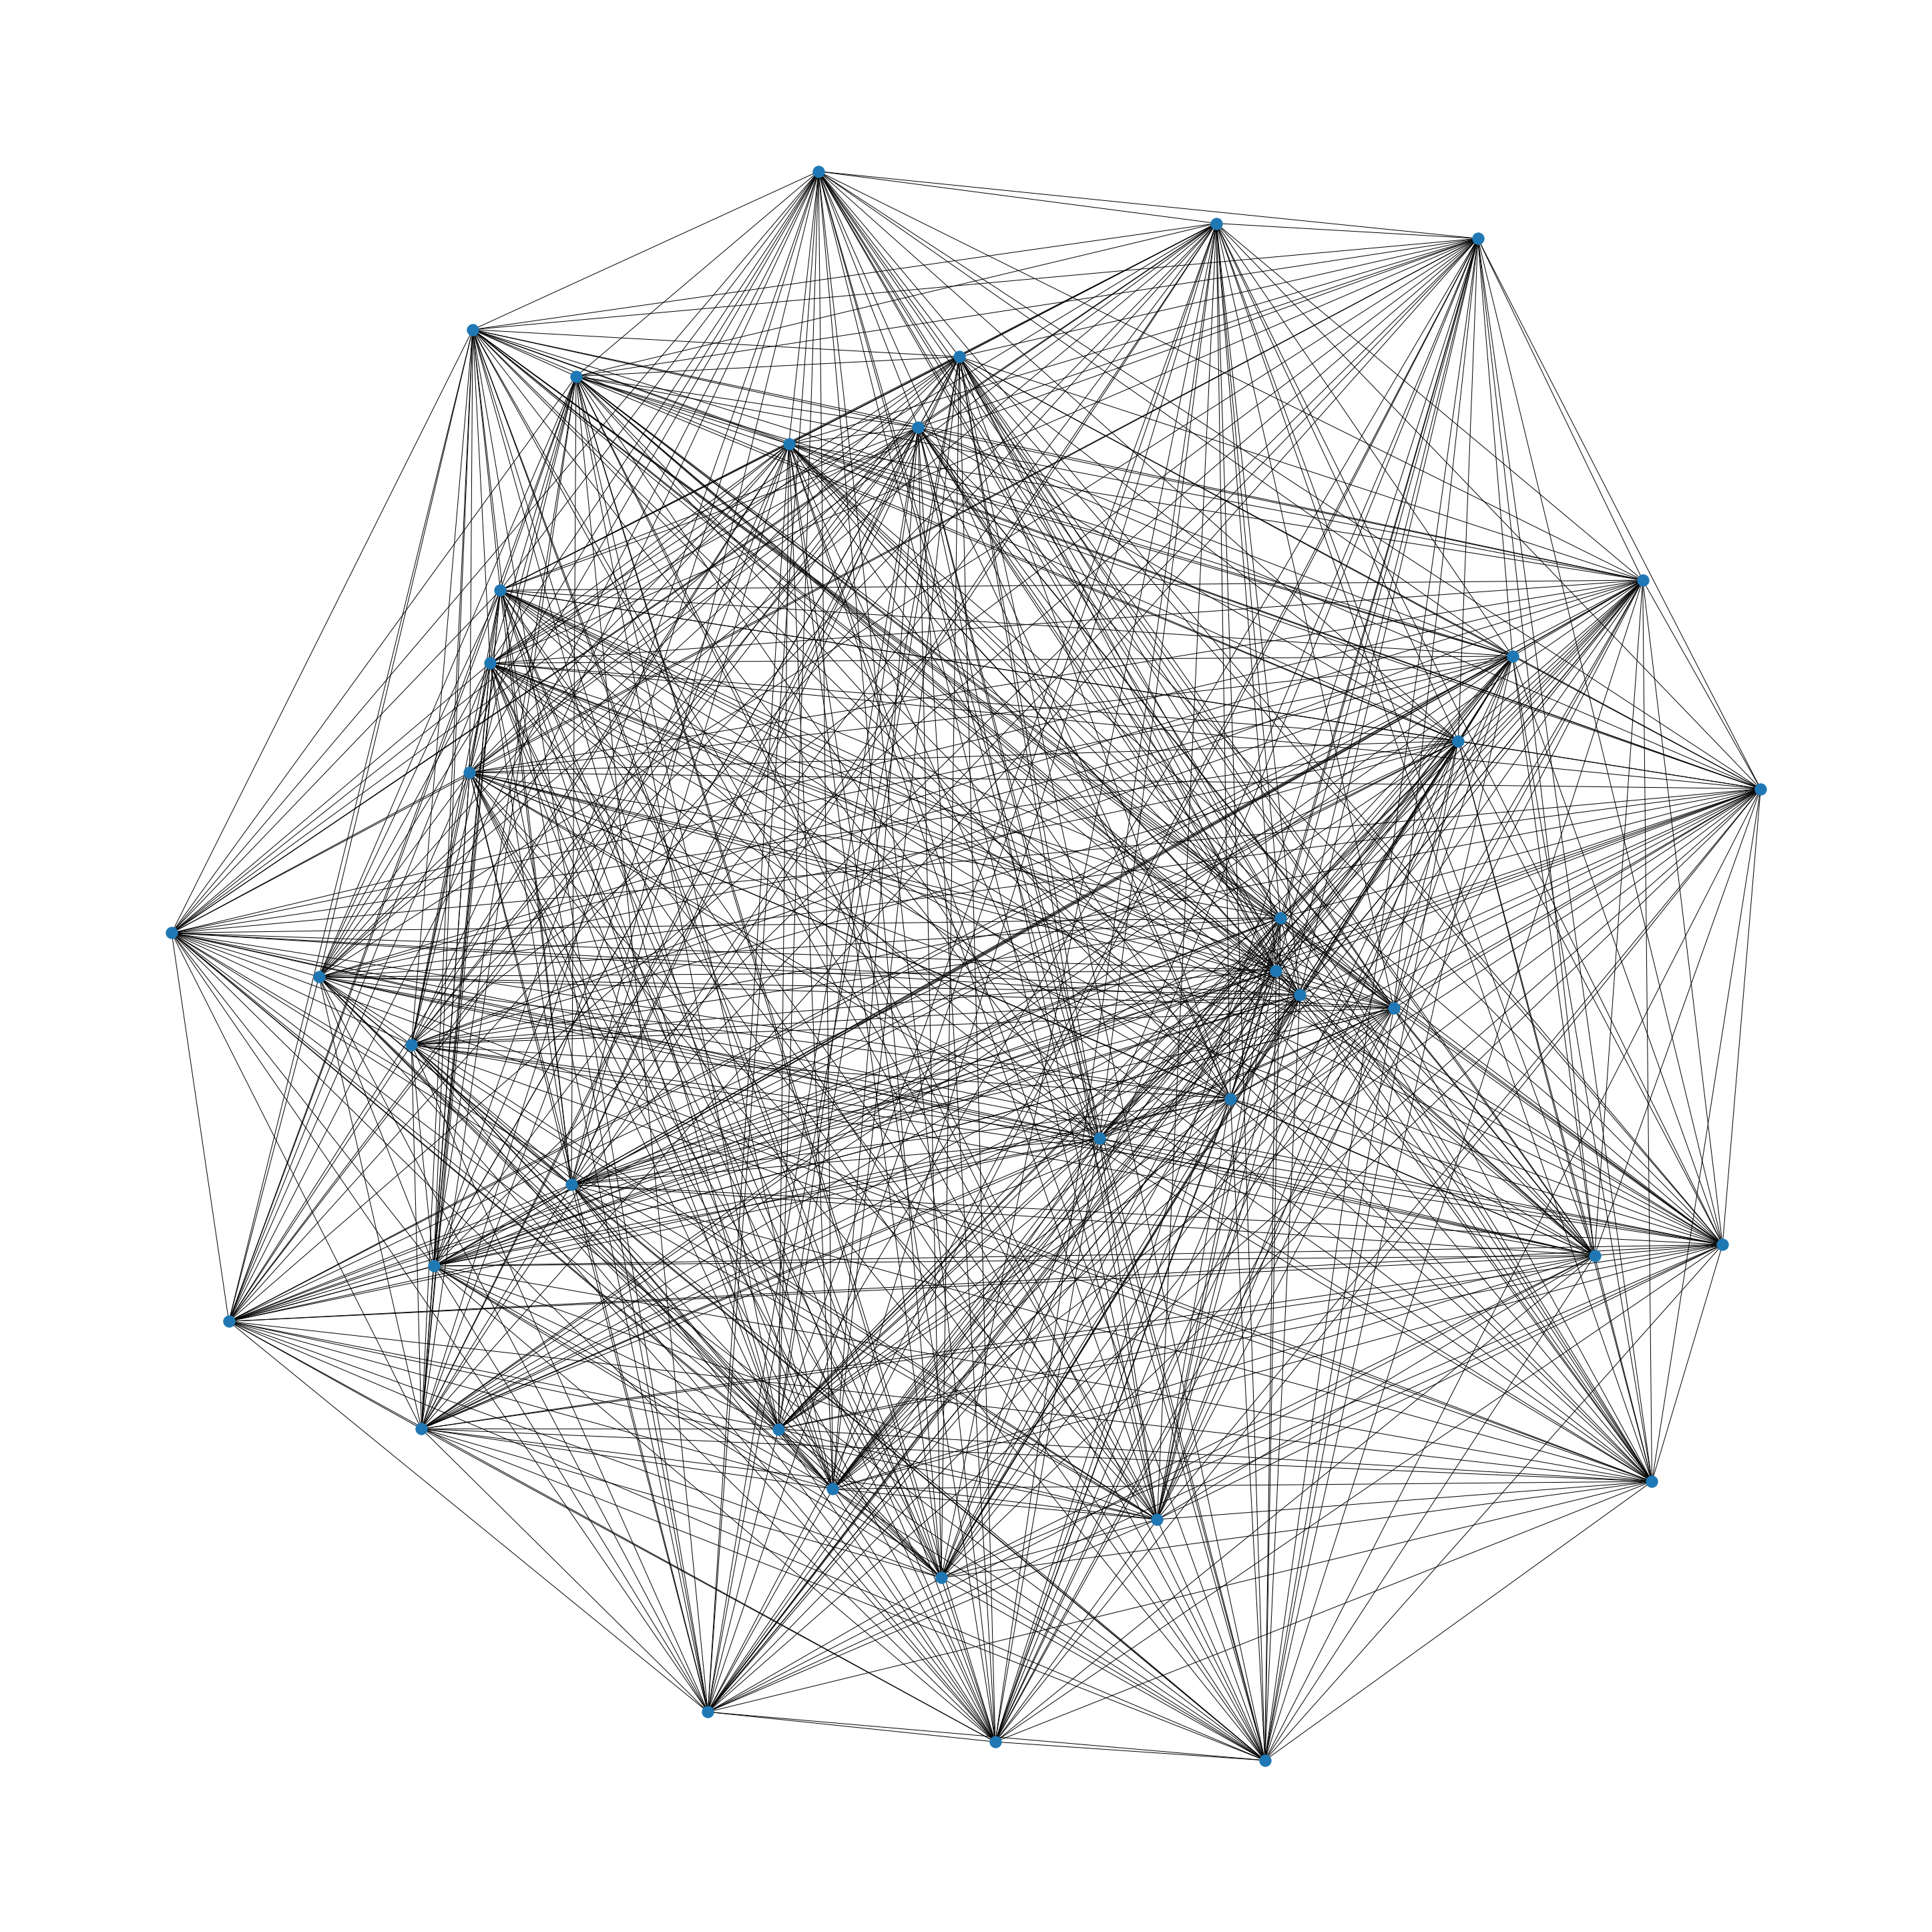

In [22]:
nx.draw(transit_network)

In [23]:
# for edge in transit_edges:
#     print(transit_network.edges[edge[0], edge[1]]['weight'])
#     print(transit_network.edges[edge[0], edge[1]]['type'])
                             

In [24]:
transit_network.edges[depot_id, package_id]['weight']

99.67803585472745

In [25]:
transit_network.edges[package_id, depot_id]['weight']

99.67803585472745

In [26]:
sub_mission_route = nx.astar_path(transit_network, depot_id, package_id)
print(sub_mission_route)

[68, 99]


In [27]:
# path finding by a star
sub_mission_cost = 0
for i in range(len(sub_mission_route)-1):
    sub_mission_cost += transit_network.edges[sub_mission_route[i], sub_mission_route[i+1]]['weight']
print(sub_mission_cost)

99.67803585472745


In [28]:
import MAPF.single_drone_FP
import imp
imp.reload(MAPF.single_drone_FP)

<module 'MAPF.single_drone_FP' from '/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/MAPF/single_drone_FP.py'>

In [316]:
x_edges, sub_mission_way = MAPF.single_drone_FP.return_route_plan(transit_network, depot_id, package_id, 400)

/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/MAPF/single_drone_FP.py:395: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c=time_cost_vector, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq,
/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/MAPF/single_drone_FP.py:395: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(c=time_cost_vector, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq,
/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/MAPF/single_drone_FP.py:395: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached

In [317]:
print(sub_mission_way)

[(99, 68)]


In [318]:
#path finding by Linear Planning
route_plan_distance_cost = 0 
for way in sub_mission_way:
    route_plan_distance_cost += transit_network.edges[way[0], way[1]]['weight']
print(route_plan_distance_cost)

99.67803585472745


In [320]:
direct_edges = {}
for (i, j) in sub_mission_way:
    direct_edges[i] = j
sub_mission_route_by_LP = [package_id]
cur_node = package_id
while len(sub_mission_route_by_LP) <= len(sub_mission_way):
    sub_mission_route_by_LP.append(direct_edges[cur_node])
    cur_node = direct_edges[cur_node]
print(sub_mission_route_by_LP)

[99, 68]


In [321]:
# we assume that flight speed is 1.5 times the transit speed
route_plan_time_cost = 0
for (i, j) in zip(sub_mission_route_by_LP[:len(sub_mission_route_by_LP)-1], sub_mission_route_by_LP[1:]):
    print(i ,j)
    if transit_network.edges[i, j]['type'] == 'flight':
        route_plan_time_cost += transit_network.edges[i, j]['weight']
    else:
        route_plan_time_cost += 1.5 * haversine(TG.nodes[i]['lon'], TG.nodes[i]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])

print(route_plan_time_cost)

99 68
99.67803585472745


In [322]:
drone_tours

[[52.0,
  51.0,
  52.0,
  54.0,
  52.0,
  55.0,
  52.0,
  59.0,
  52.0,
  75.0,
  52.0,
  79.0,
  52.0,
  99.0,
  1.0,
  99.0],
 [99.0, 13.0, 99.0, 40.0, 99.0, 68.0, 99.0, 71.0, 99.0, 72.0, 99.0],
 [99.0,
  82.0,
  99.0,
  84.0,
  99.0,
  86.0,
  99.0,
  97.0,
  99.0,
  176.0,
  99.0,
  178.0,
  99.0,
  180.0,
  99.0],
 [52.0, 104.0, 52.0, 106.0, 52.0, 108.0, 52.0],
 [52.0, 117.0, 52.0, 118.0, 52.0],
 [52.0, 139.0, 52.0, 150.0, 52.0],
 [52.0, 155.0, 52.0, 156.0, 52.0],
 [52.0, 159.0, 52.0, 160.0, 52.0],
 [52.0, 161.0, 52.0, 162.0, 52.0],
 [52.0, 163.0, 52.0, 165.0, 52.0],
 [52.0, 169.0, 52.0, 170.0, 52.0],
 [210.0, 2.0, 210.0, 4.0, 210.0, 7.0, 210.0],
 [210.0, 122.0, 210.0, 123.0, 210.0],
 [210.0, 131.0, 210.0, 132.0, 210.0, 140.0, 210.0],
 [210.0, 141.0, 210.0, 146.0, 210.0],
 [210.0,
  185.0,
  210.0,
  190.0,
  210.0,
  191.0,
  210.0,
  195.0,
  210.0,
  196.0,
  210.0,
  205.0,
  210.0],
 [210.0, 209.0, 210.0]]

In [323]:
a = [1,2,3,4]
print(a[1:3])

[2, 3]


In [324]:
b = [5,6,7,8]

In [306]:
c = a+b

In [307]:
c

[1, 2, 3, 4, 5, 6, 7, 8]